# Previsão de Eleição dos Deputados

Este documento tem objetivo de prever se determinado candidato será eleito ou não baseado em eleições passadas, utilizando aprendizagem de máquina para isto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn import preprocessing

Para realizar a modelagem dos algortmos preditivos, vamos utilizar no treino dados referentes às eleições de 2006 e 2010 e para o teste dados das eleições de 2014.

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
pd.set_option('display.max_columns', 500)
train.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,situacao
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.67,0.0,9000.0,6300.00,1300.0,0.0,14,14,16583.60,1184.54,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,nao_eleito
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.85,6625.0,15000.0,1000.00,201.0,0.0,24,23,20325.99,846.92,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,nao_eleito
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,158120.80,9301.22,2250.0,34150.0,62220.80,59500.0,0.0,123,108,146011.70,1187.09,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,eleito
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.19,0.0,1150.0,1101.12,750.0,0.0,8,8,3001.12,375.14,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,nao_eleito
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,119820.00,2496.25,0.0,50878.0,0.00,68942.0,0.0,133,120,116416.64,875.31,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,eleito


In [4]:
test.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao
0,2014,10000000135,EMERSON DA SILVA SANTOS,AC,PSOL,3,3,1580.00,526.67,0.00,1500.00,0.00,0.00,80.0,3,3,1580.00,526.67,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES"
1,2014,10000000142,GERALDO SILVA DOS SANTOS,AC,PSOL,5,5,3180.00,636.00,0.00,3100.00,0.00,0.00,80.0,6,5,3130.02,521.67,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE
2,2014,10000000158,CARLOS CESAR CORREIA DE MESSIAS,AC,PSB,40,38,336793.13,8419.83,1923.07,65700.00,154170.06,115000.00,0.0,145,139,326869.78,2254.27,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),OUTROS
3,2014,10000000161,IDESIO LUIS FRANKE,AC,PT,29,29,156719.32,5404.11,39122.32,68783.84,17000.00,6813.16,25000.0,136,121,241016.07,1772.18,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),AGRÔNOMO
4,2014,10000000163,LEONARDO CUNHA DE BRITO,AC,PT,160,146,737073.00,4606.71,10000.00,347073.00,277000.00,78000.00,25000.0,518,354,567401.15,1095.37,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO


Como uma análise prévia para estes dados já tinham sido feitas, que podem ser vista neste [notebook](https://github.com/orionwinter/machine-learning/blob/master/regressao-varios-modelos/Previs%C3%A3o%20de%20Vota%C3%A7%C3%A3o%20de%20Deputados.ipynb), os dados numéricos são bastante desbalanceados, além de existirem valores faltantes. Vamos novamente contornar esses detalhes aplicando a função de log nos dados numéricos e substituindo os valores faltantes pela média da coluna. Além disso, os valores numéricos foram normalizados entre 0 e 1, para melhorar o desempenho dos modelos. Para a utilização das variáveis categóricas, vamos criar variáveis dummies, que representam numericamente as classes, exceto para o nome do candidato.

In [5]:
# Remove nome dos candidatos
train = train.drop(["sequencial_candidato", "nome", "cargo"], axis=1)
test = test.drop(["sequencial_candidato", "nome", "cargo"], axis=1)

# Utiliza escala logarítmica
numeric_feats = train.dtypes[train.dtypes != "object"].index
train[numeric_feats] = np.log1p(train[numeric_feats])
test[numeric_feats] = np.log1p(test[numeric_feats])

# Preenche os valores faltantes
train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Normaliza variáveis numéricas entre 0 e 1
numeric_feats = train.dtypes[train.dtypes != "object"].index
train_non_numeric_feats = train.dtypes[train.dtypes == "object"].index
test_non_numeric_feats = test.dtypes[test.dtypes == "object"].index

min_max_scaler = preprocessing.MinMaxScaler()
train_normalized = min_max_scaler.fit_transform(train[numeric_feats])
test_normalized = min_max_scaler.fit_transform(test[numeric_feats])

train_normalized = pd.DataFrame(train_normalized, columns=train[numeric_feats].columns)
test_normalized = pd.DataFrame(test_normalized, columns=test[numeric_feats].columns)

train_normalized = pd.concat([train_normalized, train[train_non_numeric_feats].reset_index()], axis = 1, sort = False)
test_normalized = pd.concat([test_normalized, test[test_non_numeric_feats].reset_index()], axis = 1, sort = False)

train = train_normalized
test = test_normalized

# Cria variáveis dummies
transformed_data = pd.concat([train[train.columns[train.columns != "situacao"]], test], keys=["train", "test"])
train = pd.concat([train[["situacao"]].reset_index(drop=True), pd.get_dummies(transformed_data).loc["train"]], axis=1)
test = pd.get_dummies(transformed_data).loc["test"]

Primeiramente vamos verificar se existe desbalanceamento na variável alvo:

In [6]:
sit = train[["situacao"]].groupby(["situacao"]).size()
sit.plot(kind = "bar")

In [7]:
float(sit[0]) / float(sit[1])

0.15554881746513038

Podemos ver que existem muito mais candidatos não eleitos do que eleitos, em uma proporção de 0.156, que é cerca de 1 eleito para cada 6 não eleitos.

Como alguns algoritmos de classificação são bastante sensíveis ao desbalanceamento, isso poderia tendenciá-los a predizer pela classe majoritária, ou seja, ter uma tendência muito maior a prever que um deputado não foi eleito, visto este desbalanceamento.

Para tratar este caso, vamos utilizar uma técnica de reamostragem chamada SMOTE(Synthetic Minority Over-sampling Technique) que é um algoritmo um pouco mais rebuscado que uma simples reamostragem da classe minoritária, visto que além de reamostrar modifica sinteticamente os dados reamostrados baseado nos demais da mesma classe.

Vale ressaltar que utilizaremos os dados de 2006 para treino e 2010 para validação, logo só balancearemos os dados de treino.

In [8]:
from imblearn.over_sampling import SMOTE

def balanceia_dados(dados):
    sm = SMOTE(random_state=42)
    X = dados.loc[:, dados.columns != "situacao"]
    y = dados.situacao
    X_res, y_res = sm.fit_resample(X, y)
    dados_balanceados = pd.concat([pd.DataFrame(y_res), pd.DataFrame(X_res).reset_index(drop=True)], axis=1)
    return dados_balanceados

train_data = train[train.ano == 0]
validation_data = train[train.ano == 1]
train_bal = balanceia_dados(train_data)
train_bal.columns = train_data.columns

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


## Treinamento de modelos

Agora vamos treinar 4 modelos diferentes: regressão logística, KNN, árvore de decisão e adaboost. Em todos os treinamento serão utilizados validação cruzada com 5 folds.

In [9]:
# Regressão logistica
from sklearn.linear_model import LogisticRegressionCV

X = train_bal.loc[:, train_bal.columns != "situacao"]
Y = train_bal.situacao
X_train = train_data.drop('situacao', axis=1)
Y_train = train_data.situacao
X_validation = validation_data.drop('situacao', axis=1)
Y_validation = validation_data.situacao

lr_model = LogisticRegressionCV(cv=5, random_state=0, multi_class='ovr', scoring="f1").fit(X, Y)
lr_train_predict = lr_model.predict(X_train)
lr_train_y_score = lr_model.decision_function(X_train)
lr_validation_predict = lr_model.predict(X_validation)
lr_validation_y_score = lr_model.decision_function(X_validation)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [10]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

ks = [1, 2, 3, 5, 8, 13, 21, 25, 34, 41, 55]
f1_scorer = make_scorer(f1_score, pos_label="eleito")
cv_knn = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, Y, 
                          scoring=f1_scorer, cv = 5).mean() 
          for k in ks]
best_k = ks[np.argmax(cv_knn)]
knn_model = KNeighborsClassifier(n_neighbors=best_k).fit(X, Y)

knn_train_predict = knn_model.predict(X_train)
knn_train_y_score = knn_model.predict_proba(X_train)[:, 1]
knn_validation_predict = knn_model.predict(X_validation)
knn_validation_y_score = knn_model.predict_proba(X_validation)[:, 1]

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

In [11]:
# Árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

max_depths = [1, 2, 3, 5, 8, 13, 21, 25, 34, 41, 55]
f1_scorer = make_scorer(f1_score, pos_label="eleito")
cv_dt = [cross_val_score(DecisionTreeClassifier(max_depth=md), X, Y, 
                          scoring=f1_scorer, cv = 5).mean() 
          for md in max_depths]
best_md = max_depths[np.argmax(cv_dt)]
dt_model = DecisionTreeClassifier(max_depth=best_md).fit(X, Y)

dt_train_predict = dt_model.predict(X_train)
dt_train_y_score = dt_model.predict_proba(X_train)[:, 1]
dt_validation_predict = dt_model.predict(X_validation)
dt_validation_y_score = dt_model.predict_proba(X_validation)[:, 1]

In [12]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

num_estimators = [55, 89, 144, 233, 377, 610, 987]
f1_scorer = make_scorer(f1_score, pos_label="eleito")
cv_ab = [cross_val_score(AdaBoostClassifier(n_estimators=ne), X, Y, 
                          scoring=f1_scorer, cv = 5).mean() 
          for ne in num_estimators]
best_ne = num_estimators[np.argmax(cv_ab)]
ab_model = AdaBoostClassifier(n_estimators=best_ne).fit(X, Y)

ab_train_predict = ab_model.predict(X_train)
ab_train_y_score = ab_model.predict_proba(X_train)[:, 1]
ab_validation_predict = ab_model.predict(X_validation)
ab_validation_y_score = ab_model.predict_proba(X_validation)[:, 1]

## Avaliação dos modelos

Agora vamos reportar o Precision, Recall, AUC da curva ROC no treino e validação para cada modelo treinado.

In [13]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

train_y_true = train_data.situacao.values
validation_y_true = validation_data.situacao.values

# Regressão Logistica
lr_train_precision = precision_score(train_y_true, lr_train_predict, pos_label="eleito")
lr_train_recall = recall_score(train_y_true, lr_train_predict, pos_label="eleito")
lr_train_auc_roc = roc_auc_score(train_y_true, lr_train_y_score)

lr_validation_precision = precision_score(validation_y_true, lr_validation_predict, pos_label="eleito")
lr_validation_recall = recall_score(validation_y_true, lr_validation_predict, pos_label="eleito")
lr_validation_auc_roc = roc_auc_score(validation_y_true, lr_validation_y_score)

# KNN
knn_train_precision = precision_score(train_y_true, knn_train_predict, pos_label="eleito")
knn_train_recall = recall_score(train_y_true, knn_train_predict, pos_label="eleito")
knn_train_auc_roc = roc_auc_score(train_y_true, knn_train_y_score)

knn_validation_precision = precision_score(validation_y_true, knn_validation_predict, pos_label="eleito")
knn_validation_recall = recall_score(validation_y_true, knn_validation_predict, pos_label="eleito")
knn_validation_auc_roc = roc_auc_score(validation_y_true, knn_validation_y_score)

# Árvore de decisão
dt_train_precision = precision_score(train_y_true, dt_train_predict, pos_label="eleito")
dt_train_recall = recall_score(train_y_true, dt_train_predict, pos_label="eleito")
dt_train_auc_roc = roc_auc_score(train_y_true, dt_train_y_score)

dt_validation_precision = precision_score(validation_y_true, dt_validation_predict, pos_label="eleito")
dt_validation_recall = recall_score(validation_y_true, dt_validation_predict, pos_label="eleito")
dt_validation_auc_roc = roc_auc_score(validation_y_true, dt_validation_y_score)

# Adaboost
ab_train_precision = precision_score(train_y_true, ab_train_predict, pos_label="eleito")
ab_train_recall = recall_score(train_y_true, ab_train_predict, pos_label="eleito")
ab_train_auc_roc = roc_auc_score(train_y_true, ab_train_y_score)

ab_validation_precision = precision_score(validation_y_true, ab_validation_predict, pos_label="eleito")
ab_validation_recall = recall_score(validation_y_true, ab_validation_predict, pos_label="eleito")
ab_validation_auc_roc = roc_auc_score(validation_y_true, ab_validation_y_score)

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 1600x480 with 0 Axes>

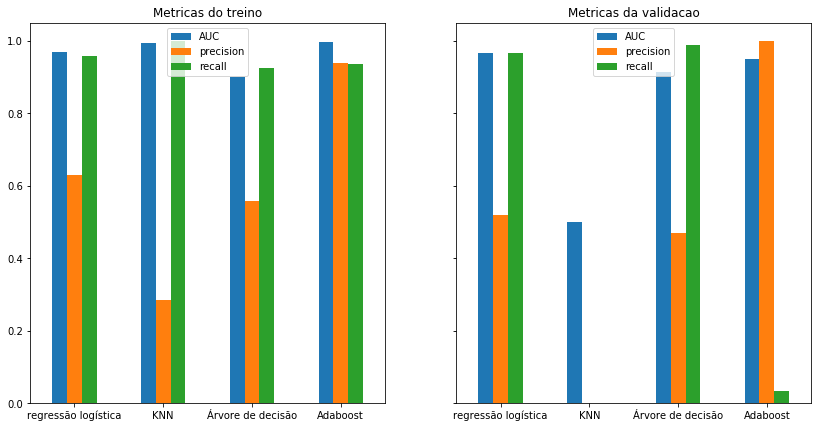

In [14]:
matplotlib.pyplot.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

train_precision = [lr_train_precision, knn_train_precision, dt_train_precision, ab_train_precision]
train_recall = [lr_train_recall, knn_train_recall, dt_train_recall, ab_train_recall]
train_auc = [lr_train_auc_roc, knn_train_auc_roc, dt_train_auc_roc, ab_train_auc_roc]

validation_precision = [lr_validation_precision, knn_validation_precision, dt_validation_precision, ab_validation_precision]
validation_recall = [lr_validation_recall, knn_validation_recall, dt_validation_recall, ab_validation_recall]
validation_auc = [lr_validation_auc_roc, knn_validation_auc_roc, dt_validation_auc_roc, ab_validation_auc_roc]

index = ["regressão logística", "KNN", "Árvore de decisão", "Adaboost"]

df_train = pd.DataFrame({"precision": train_precision, "recall": train_recall, "AUC": train_auc}, index=index)
df_validation = pd.DataFrame({"precision": validation_precision, "recall": validation_recall, "AUC": validation_auc}, index=index)

fig, (ax, ax2) = matplotlib.pyplot.subplots(ncols=2, sharey=True, figsize=(14, 7))
ax.set_title("Metricas do treino")
ax2.set_title("Metricas da validacao")
df_train.plot.bar(rot=0, ax=ax)
df_validation.plot.bar(rot=0, ax=ax2)
matplotlib.pyplot.show()

Como pode ser visto nas visualizações acima, existe uma grande diferença do treino para a validação como é o caso do KNN, visto que tanto o precision quanto o recall caem para zero. Os demais modelos perdem um pouco de precisão, enquanto o recall aumenta e a AUC permanece razoavelmente constante.

Excluindo o KNN, os modelos parecem ter um desempenho razoável, apesar da grande diferença entre o precision e o recall. Essa diferença indica que os modelos tendem a ter uma taxa de falsos positivos considerávelmente alta, ou seja, eles tendem a predizer mais que um candidato vai ser eleito onde o mesmo não foi do que o contrário. Como a regressão logística teve valores bastante similares para o recall e ligeiramente maior para o precision na validação, vamos escolher este como sendo o melhor modelo.

## Interpretação das saídas dos modelos

Agora vamos verificar as saídas de cada modelo, vendo os atributos mais importantes de cada um.

In [15]:
lr_coef =  pd.Series(lr_model.coef_[0], index=X_train.columns)
lr_imp_coef = pd.concat([lr_coef.sort_values().head(5)])

Text(0.5,1,'Coeficientes da regressao logistica')

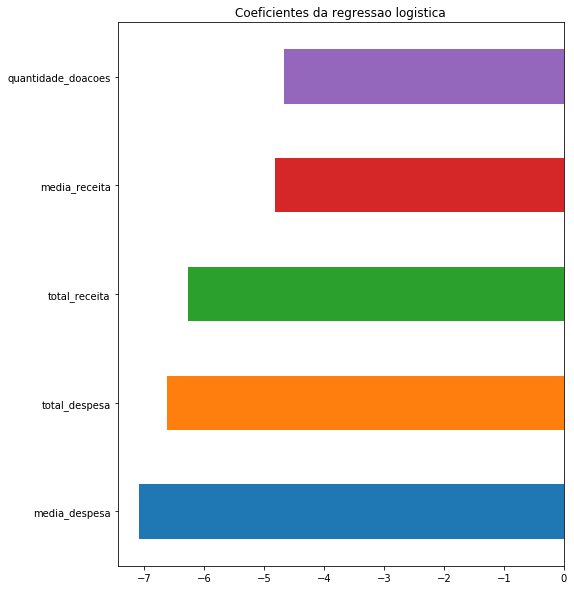

In [16]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
lr_imp_coef.plot(kind = "barh")
matplotlib.pyplot.title("Coeficientes da regressao logistica")

Considerando que a regressão logística setou por default que a classe positiva é nao_eleito, ou seja, quanto menor o coeficiente mais ele influencia para o candidato ser eleito, então de acordo com o modelo de regressão logística:

* Algumas características monetárias como quantidade de doações, média da receita, total da receita, total da despesa e média da despesa influenciam positivamente para a eleição dos deputados.

Como o KNN é um método não paramétrico, vamos verificar quais variáveis são mais importantes de uma maneira alternativa: treinando um modelo KNN para cada variável e verificar qual a com o melhor f1-score:

In [17]:
clf = KNeighborsClassifier(n_neighbors=best_k)
f1_scorer = make_scorer(f1_score, pos_label="eleito")

var_imp_df = pd.DataFrame({"coluna":[], "f1_score":[]})
for column_name in X.columns:
    X_unique_col = pd.DataFrame(X.get(column_name))
    scores = cross_val_score(clf, X_unique_col, Y, scoring=f1_scorer)
    var_imp_df = pd.concat([var_imp_df, 
                            pd.DataFrame({"coluna":[column_name], "f1_score":[scores.mean()]}, 
                                         index=[column_name])])

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:26

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

Text(0.5,1,'Variaveis mais importantes do KNN')

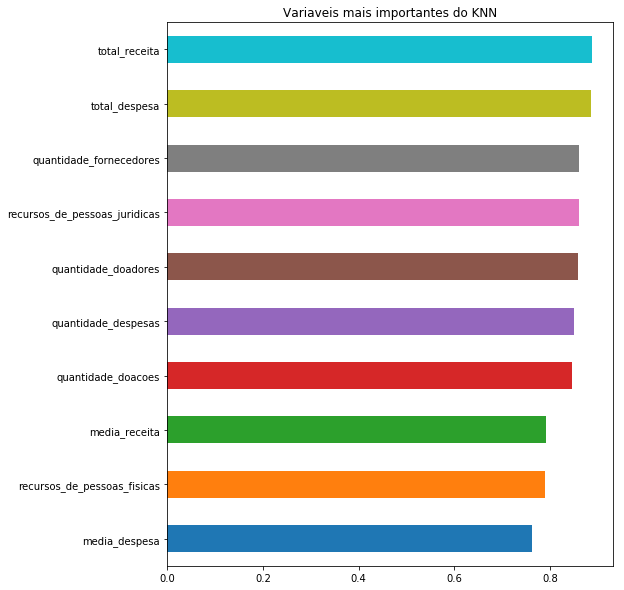

In [18]:
knn_coef =  var_imp_df.f1_score
knn_imp_coef = pd.concat([knn_coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
knn_imp_coef.plot(kind = "barh")
matplotlib.pyplot.title("Variaveis mais importantes do KNN")

De forma contrária ao modelo de regressão logística, as variáveis mais importantes do modelo foram as relacionadas ao valor monetário, que sozinhas tiveram um f1-score em média de 0,8.

Vejamos agora as variáveis mais importante da árvore de decisão:

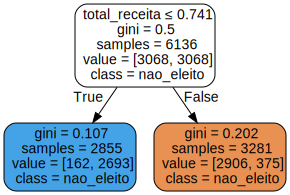

In [19]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                     feature_names=X.columns,
                     class_names=Y,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Pode ser visto que a variável mais importante para a árvore de decisão, sendo esta a única usada, é o total da receita utilizada na campanha do deputado.

Vejamos por último a importancia das variáveis para o modelo de AdaBoost

Text(0.5,1,'Coeficientes do Adaboost')

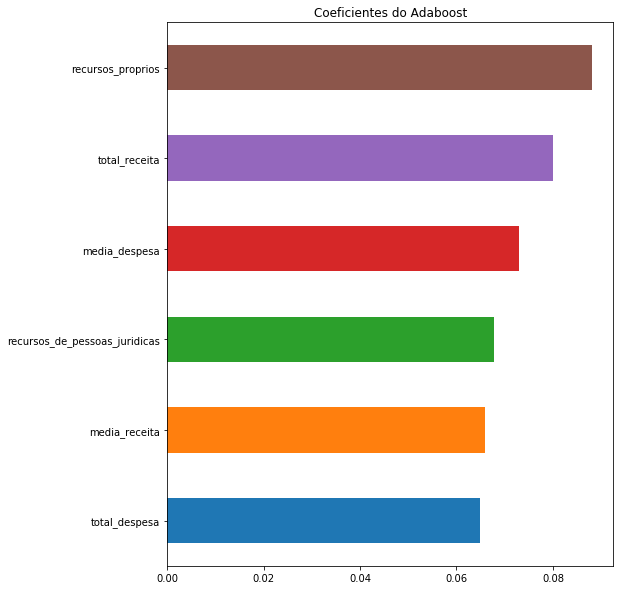

In [20]:
ab_coef =  pd.Series(ab_model.feature_importances_, index=X_train.columns)
ab_imp_coef = pd.concat([ab_coef.sort_values().tail(6)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
ab_imp_coef.plot(kind = "barh")
matplotlib.pyplot.title("Coeficientes do Adaboost")

 Como pode ser visto acima, a característica mais importante para o modelo AdaBoost é se o deputado é casado. Outro atributo importante do candidato é quando ele já é deputado, tendo importancia muito parecida se ele tem ensino superior completo e o total da receita que ele teve na campanha. Outras duas características que foram bastante importantes são o total que o candidato teve de despesa em sua candidatura e se a ocupação dele era médico.

## Submissão do Kaggle

Por último, utilizaremos os dados de treino completos, que contemplam as eleições de 2006 e 2010 e para o teste utilizaremos os dados de 2014.

Como os modelos de regressão logística foram muito semelhantes, tanto na precisão quanto no recall, como pode ser visto abaixo, submeteremos para o kaggle a previsão destes dois modelos.

In [21]:
df_validation

,AUC,precision,recall
regressão logística,0.967157,0.520462,0.966862
KNN,0.500000,0.000000,0.000000
Árvore de decisão,0.913511,0.471190,0.988304
Adaboost,0.948884,1.000000,0.033138


In [22]:
train_data_final = balanceia_dados(train)
train_data_final.columns = train_data.columns

X_final = train_data_final.loc[:, train_data_final.columns != "situacao"]
Y_final = train_data_final.situacao

# regressão logística
lr_model_final = LogisticRegressionCV(cv=5, random_state=0, multi_class='ovr', scoring="f1").fit(X_final, Y_final)
lr_test_predict = lr_model.predict(test)

# Adaboost
num_estimators = [21, 34, 55, 89, 144, 233, 377, 610, 987]
f1_scorer = make_scorer(f1_score, pos_label="eleito")
cv_ab_final = [cross_val_score(AdaBoostClassifier(n_estimators=ne), X_final, Y_final, 
                          scoring=f1_scorer, cv = 5).mean() 
          for ne in num_estimators]
best_ne_final = num_estimators[np.argmax(cv_ab_final)]
ab_model_final = AdaBoostClassifier(n_estimators=best_ne_final).fit(X_final, Y_final)

ab_test_predict = ab_model_final.predict(test)

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


In [23]:
ids = pd.read_csv("data/test.csv").sequencial_candidato

lr_predicted_df = pd.DataFrame({"Id": ids, "Predicted": lr_test_predict})
lr_predicted_df.to_csv("data/output/regressao_logistica_predict.csv", sep=",", encoding="utf-8",
                       index=False, index_label=False)

ab_predicted_df = pd.DataFrame({"Id": ids, "Predicted": ab_test_predict})
ab_predicted_df.to_csv("data/output/adaboost_predict.csv", sep=",", encoding="utf-8", 
                       index=False, index_label=False)

Como a predição teve acurácia relativamente baixa, vamos treinar com outros 3 modelos, o random forest, gradient boosting e SVM:

In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

n_estimators = [21, 34, 55, 89, 144, 233, 377, 610, 987]
f1_scorer = make_scorer(f1_score, pos_label="eleito")
cv_rf_final = [cross_val_score(RandomForestClassifier(n_estimators=ne, n_jobs=-1), X_final, Y_final, 
                          scoring=f1_scorer, cv = 5).mean() 
          for ne in n_estimators]
best_ne_final = n_estimators[np.argmax(cv_rf_final)]
rf_model_final = RandomForestClassifier(n_estimators=best_ne_final, n_jobs=-1).fit(X_final, Y_final)

rf_test_predict = rf_model_final.predict(test)

rf_predicted_df = pd.DataFrame({"Id": ids, "Predicted": rf_test_predict})
rf_predicted_df.to_csv("data/output/random_forest_predict.csv", sep=",", encoding="utf-8", 
                       index=False, index_label=False)

In [34]:
# SVM
from sklearn import svm

degrees = [1, 2, 3, 5]
f1_scorer = make_scorer(f1_score, pos_label="eleito")
cv_svm_final = [cross_val_score(svm.SVC(gamma="scale", random_state=1, degree=de), 
                               X_final, Y_final, scoring=f1_scorer, cv = 5).mean() 
          for de in degrees]
best_d_final = degrees[np.argmax(cv_svm_final)]
svm_model_final = svm.SVC(gamma="scale", random_state=1, degree=best_d_final).fit(X_final, Y_final)

svm_test_predict = svm_model_final.predict(test)

svm_predicted_df = pd.DataFrame({"Id": ids, "Predicted": svm_test_predict})
svm_predicted_df.to_csv("data/output/svm_predict.csv", sep=",", encoding="utf-8", 
                       index=False, index_label=False)

In [35]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [55, 89, 144, 233, 377]
f1_scorer = make_scorer(f1_score, pos_label="eleito")
cv_gb_final = [cross_val_score(GradientBoostingClassifier(n_estimators=ne), X_final, Y_final, 
                          scoring=f1_scorer, cv = 5).mean() 
          for ne in n_estimators]
best_ne_final = n_estimators[np.argmax(cv_gb_final)]
gb_model_final = GradientBoostingClassifier(n_estimators=best_ne_final).fit(X_final, Y_final)

gb_test_predict = gb_model_final.predict(test)

gb_predicted_df = pd.DataFrame({"Id": ids, "Predicted": gb_test_predict})
gb_predicted_df.to_csv("data/output/gradient_boosting_predict.csv", sep=",", encoding="utf-8", 
                       index=False, index_label=False)